In [28]:
import pickle as p
import matplotlib.pyplot as plt
import numpy as np
import os
import copy

def read_obj_point(obj_path):
    with open(obj_path, 'r') as f:
        content_list = f.readlines()
        point_list = [line.rstrip("\n").lstrip("v ").split(" ") for line in content_list]
        for point in point_list:
            for i in range(3):
                point[i] = float(point[i])
        return np.array(point_list)

with open(r"C:\Users\haolinliu\Downloads\prepare_data\test\rendertask3001.pkl","rb") as f:
    data=p.load(f)
print(data.keys())

dict_keys(['rgb_img', 'depth_map', 'layout', 'camera', 'boxes', 'sequence_id', 'scene_id'])


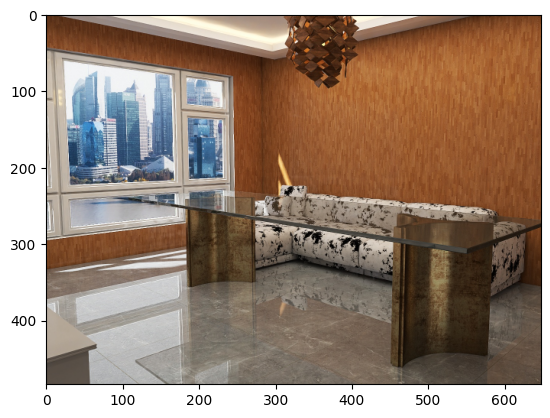

In [29]:
img=data["rgb_img"]
height,width=img.shape[0:2]
plt.imshow(img)

In [30]:
boxes=data["boxes"]
camera=data['camera']
jid=boxes['jid'][0]
scale = boxes['scale'][0]
tran_matrix = boxes["tran_matrix"][0]
tran_matrix[1, 3] = 0

wrd2cam_matrix = camera['wrd2cam_matrix']
org_K = camera['K'].copy()
K = org_K.copy()
K[0] = K[0] / 2
K[1] = K[1] / 2

In [31]:
occ_dir=r"C:\Users\haolinliu\Downloads\occ"

inside_occ_path = os.path.join(occ_dir, jid, "inside_points.obj")
inside_sample = read_obj_point(inside_occ_path)
inside_sample = inside_sample * scale
homo_points = np.concatenate([inside_sample.copy(), np.ones((inside_sample.shape[0], 1))], axis=1)
cam_samples = np.dot(homo_points, np.dot(wrd2cam_matrix, tran_matrix).T)  # y up coordinate
cam_samples[:, 0:2] = -cam_samples[:, 0:2]

In [32]:
img_samples=np.dot(cam_samples[:,0:3],K.T)
x=img_samples[:,0]/img_samples[:,2]
y=img_samples[:,1]/img_samples[:,2]
x=np.clip(x,a_min=0,a_max=width-1).astype(np.int32)
y=np.clip(y,a_min=0,a_max=height-1).astype(np.int32)

canvas=copy.deepcopy(img)
canvas[y,x]